# Titanic Analysis

In [1654]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## EDA

In [1655]:
# read csv
df_train = pd.read_csv('train.csv')

In [1656]:
# first 5 rows
df_train.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [1657]:
df_train.shape

(891, 12)

In [1658]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## Preprocessing

In [1659]:
# check duplicate
dup_count = df_train.duplicated().sum()
print(dup_count)

0


In [1660]:
# check null values
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [1661]:
for column in df_train.columns:
    missing_val_percent = df_train[column].isnull().sum()/df_train.shape[0]
    print(f"Missing values percentage in the {column}: {missing_val_percent}")

Missing values percentage in the PassengerId: 0.0
Missing values percentage in the Survived: 0.0
Missing values percentage in the Pclass: 0.0
Missing values percentage in the Name: 0.0
Missing values percentage in the Sex: 0.0
Missing values percentage in the Age: 0.19865319865319866
Missing values percentage in the SibSp: 0.0
Missing values percentage in the Parch: 0.0
Missing values percentage in the Ticket: 0.0
Missing values percentage in the Fare: 0.0
Missing values percentage in the Cabin: 0.7710437710437711
Missing values percentage in the Embarked: 0.002244668911335578


Text(0.5, 1.0, 'Boxplot for Age')

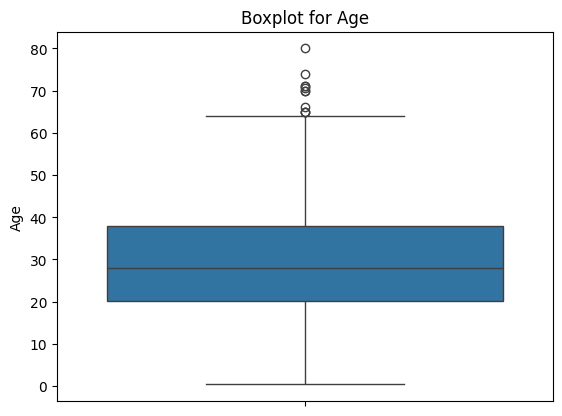

In [1662]:
sns.boxplot(df_train['Age'])
plt.title('Boxplot for Age')

In [1663]:
df_train['Age'] = df_train['Age'].fillna(df_train['Age'].median())

In [1664]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [1665]:
df_train['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [1666]:
# so many missing values
df_train.drop('Cabin', axis=1, inplace=True)

In [1667]:
df_train['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [1668]:
df_train['Embarked'] = df_train['Embarked'].fillna(df_train['Embarked'].mode()[0])

In [1669]:
df_train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [1670]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [1671]:
# retrieve a title in a name
def extract_title(name):
    title = name.split(',')[1].split('.')[0].strip()
    return title

df_train['Title'] = df_train['Name'].apply(extract_title)

In [1672]:
df_train['NameLength'] = df_train['Name'].apply(len)

In [1673]:
df_train.drop('Name', axis=1, inplace=True)
df_train.drop('Ticket', axis=1, inplace=True)

df_train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,NameLength
0,1,0,3,male,22.0,1,0,7.2500,S,Mr,23
1,2,1,1,female,38.0,1,0,71.2833,C,Mrs,51
2,3,1,3,female,26.0,0,0,7.9250,S,Miss,22
3,4,1,1,female,35.0,1,0,53.1000,S,Mrs,44
4,5,0,3,male,35.0,0,0,8.0500,S,Mr,24


## Encoding

In [1674]:
df_train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Sex             object
Age            float64
SibSp            int64
Parch            int64
Fare           float64
Embarked        object
Title           object
NameLength       int64
dtype: object

In [1675]:
# one hot encoding
sex_enc = pd.get_dummies(df_train['Sex'], drop_first=True)
sex_enc

,male
0,True
1,False
2,False
3,False
4,True
...,...
886,True
887,False
888,False
889,True


In [1676]:
# one hot encoding
embarked_enc = pd.get_dummies(df_train['Embarked'], drop_first=True)
embarked_enc

,Q,S
0,False,True
1,False,False
2,False,True
3,False,True
4,False,True
...,...,...
886,False,True
887,False,True
888,False,True
889,False,False


In [1677]:
title_enc = pd.get_dummies(df_train['Title'], drop_first=True)
title_enc

,Col,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir,the Countess
0,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
2,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
887,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
888,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
889,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False


In [1678]:
df_train = pd.concat([df_train, sex_enc, embarked_enc], axis=1)
df_train.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,NameLength,male,Q,S
0,1,0,3,male,22.0,1,0,7.2500,S,Mr,23,True,False,True
1,2,1,1,female,38.0,1,0,71.2833,C,Mrs,51,False,False,False
2,3,1,3,female,26.0,0,0,7.9250,S,Miss,22,False,False,True
3,4,1,1,female,35.0,1,0,53.1000,S,Mrs,44,False,False,True
4,5,0,3,male,35.0,0,0,8.0500,S,Mr,24,True,False,True
5,6,0,3,male,28.0,0,0,8.4583,Q,Mr,16,True,True,False
6,7,0,1,male,54.0,0,0,51.8625,S,Mr,23,True,False,True
7,8,0,3,male,2.0,3,1,21.0750,S,Master,30,True,False,True
8,9,1,3,female,27.0,0,2,11.1333,S,Mrs,49,False,False,True
9,10,1,2,female,14.0,1,0,30.0708,C,Mrs,35,False,False,False


In [1679]:
df_train.drop('Sex', axis=1, inplace=True)
df_train.drop('Embarked', axis=1, inplace=True)
df_train.drop('Title', axis=1, inplace=True)
df_train.head(10)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,NameLength,male,Q,S
0,1,0,3,22.0,1,0,7.2500,23,True,False,True
1,2,1,1,38.0,1,0,71.2833,51,False,False,False
2,3,1,3,26.0,0,0,7.9250,22,False,False,True
3,4,1,1,35.0,1,0,53.1000,44,False,False,True
4,5,0,3,35.0,0,0,8.0500,24,True,False,True
5,6,0,3,28.0,0,0,8.4583,16,True,True,False
6,7,0,1,54.0,0,0,51.8625,23,True,False,True
7,8,0,3,2.0,3,1,21.0750,30,True,False,True
8,9,1,3,27.0,0,2,11.1333,49,False,False,True
9,10,1,2,14.0,1,0,30.0708,35,False,False,False


In [1680]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,NameLength
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208,26.965208
std,257.353842,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429,9.281607
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,12.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400,20.000000
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,25.000000
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000,30.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,82.000000


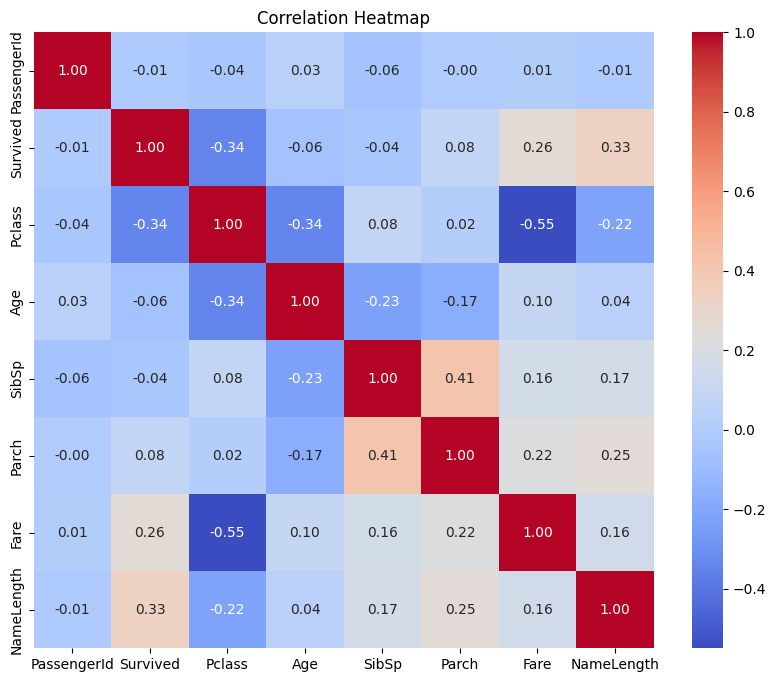

In [1681]:
numeric_data = df_train.select_dtypes(include=['float64', 'int64'])
corr_matrix = numeric_data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Correlation Heatmap')
plt.show()

In [1682]:
# df_train.drop("PassengerId", axis=1, inplace=True)
# df_train.drop("SibSp", axis=1, inplace=True)
# df_train.drop("Parch", axis=1, inplace=True)


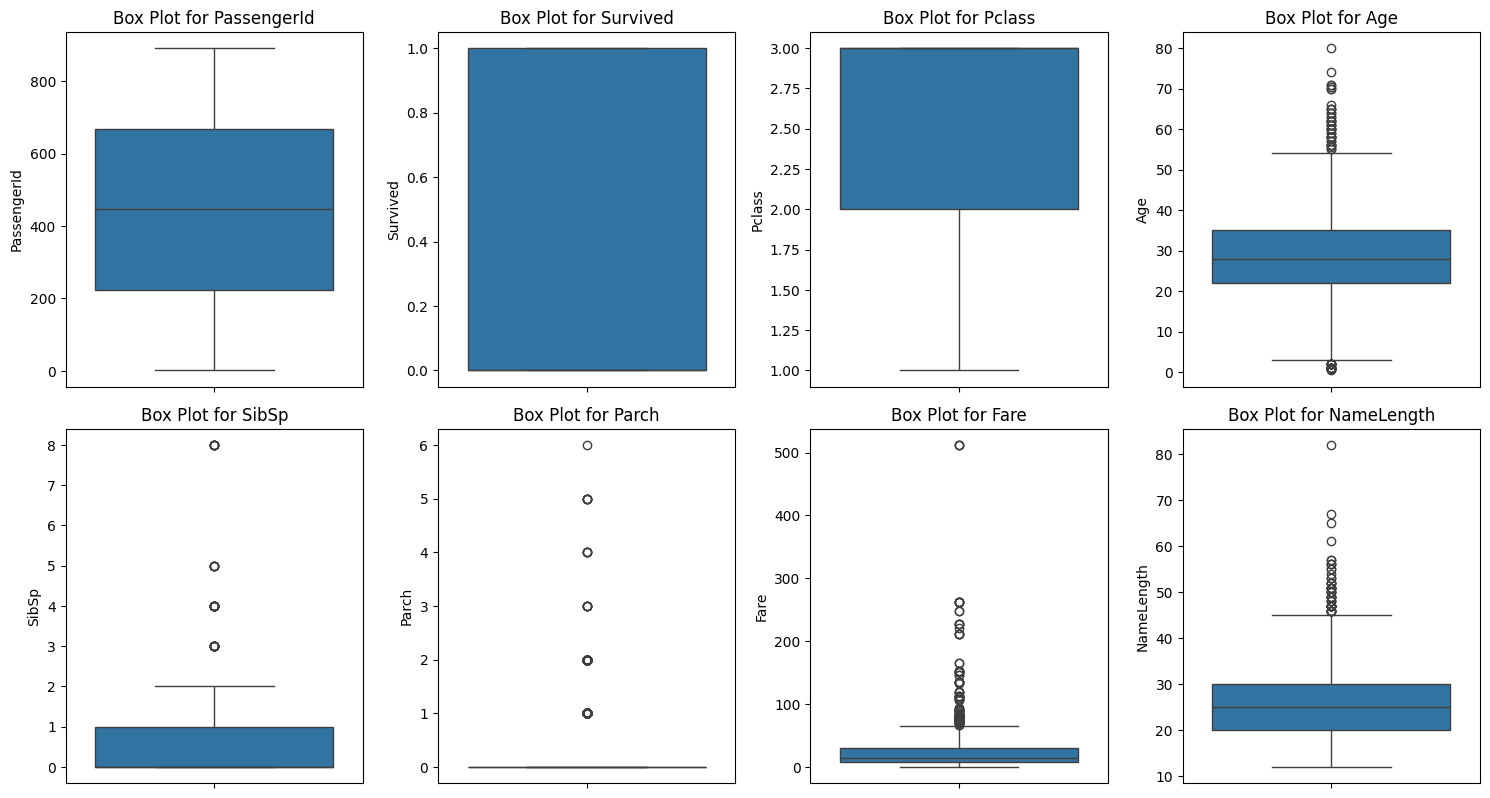

In [1683]:
numeric_columns = df_train.select_dtypes(include=["float64", "int64"]).columns

fig, axes = plt.subplots(3, 4, figsize=(15, 12)) 
axes = axes.flatten()

for i, column in enumerate(numeric_columns):
    sns.boxplot(y=df_train[column], ax=axes[i])
    axes[i].set_title(f'Box Plot for {column}')

for j in range(len(numeric_columns), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show() 

## Feature Scaling

In [1684]:
from sklearn.model_selection import train_test_split

#Identify the target and independent variables
X = df_train.drop('Survived', axis=1)
Y = df_train['Survived']

#Split the data into train and test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
print(f"Size of training data: {X_train.shape[0]}")
print(f"Size of test data: {X_test.shape[0]}")

Size of training data: 712
Size of test data: 179


In [1685]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

scaler = StandardScaler()
X_train['Age'] = scaler.fit_transform(X_train[['Age']] )
X_test['Age'] = scaler.transform(X_test[['Age']])

rob_scaler = RobustScaler()
X_train['Fare'] = rob_scaler.fit_transform(X_train[['Fare']])
X_test['Fare'] = rob_scaler.transform(X_test[['Fare']])

X_train.head(10)

,PassengerId,Pclass,Age,SibSp,Parch,Fare,NameLength,male,Q,S
331,332,1,1.253641,0,0,0.622184,19,True,False,True
733,734,2,-0.477284,0,0,-0.064416,26,True,False,True
382,383,3,0.215086,0,0,-0.289223,18,True,False,True
704,705,3,-0.246494,1,0,-0.292359,23,True,False,True
813,814,3,-1.785093,4,2,0.745107,34,False,False,True
118,119,1,-0.400354,0,1,10.324102,24,True,False,False
536,537,1,1.215176,0,0,0.535805,33,True,False,True
361,362,2,-0.015704,1,0,0.587668,25,True,False,False
29,30,3,-0.092634,0,0,-0.290516,19,True,False,True
55,56,1,-0.092634,0,0,0.932261,17,True,False,True


## Model Implementation

In [1686]:
from sklearn.linear_model import LogisticRegression


lr = LogisticRegression(max_iter=99999,random_state=42)
lr.fit(X_train, Y_train)
log_train_acc = lr.score(X_train, Y_train)
log_test_acc = lr.score(X_test, Y_test)

print(f"Logistic Regression: Training Accuracy = {log_train_acc:.2f}, Testing Accuracy = {log_test_acc:.2f}")


Logistic Regression: Training Accuracy = 0.81, Testing Accuracy = 0.81


Confusion Matrix for Logistic Regression:
[[89 16]
 [18 56]]
Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.83      0.85      0.84       105
           1       0.78      0.76      0.77        74

    accuracy                           0.81       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179

Accuracy for Logistic Regression: 0.81
Confusion Matrix for KNN:
[[81 24]
 [49 25]]
Classification Report for KNN:
              precision    recall  f1-score   support

           0       0.62      0.77      0.69       105
           1       0.51      0.34      0.41        74

    accuracy                           0.59       179
   macro avg       0.57      0.55      0.55       179
weighted avg       0.58      0.59      0.57       179

Accuracy for KNN: 0.59
Confusion Matrix for Decision Tree:
[[83 22]
 [17 57]]
Classification Report for Decision Tree:
    

/Users/suguruohashi/git/ds-0924/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/suguruohashi/git/ds-0924/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/suguruohashi/git/ds-0924/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.cap

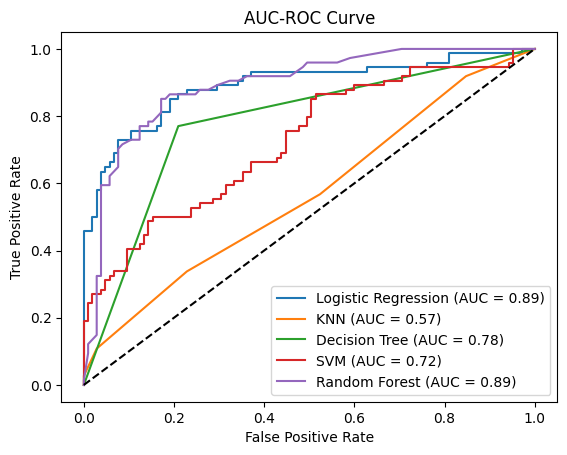

In [1687]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_curve, auc

# Initialize models
models = {
    "Logistic Regression": LogisticRegression(max_iter=9999,random_state=42),
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "SVM": SVC(probability=True),
    "Random Forest": RandomForestClassifier(random_state=42)
}

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, Y_train)

    # Make predictions
    y_pred = model.predict(X_test)
    y_pred_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

    # Evaluation metrics
    print(f"Confusion Matrix for {name}:")
    print(confusion_matrix(Y_test, y_pred))
    print(f"Classification Report for {name}:")
    print(classification_report(Y_test, y_pred))
    print(f"Accuracy for {name}: {accuracy_score(Y_test, y_pred):.2f}")

    # Plot AUC-ROC curve
    if y_pred_prob is not None:
        fpr, tpr, thresholds = roc_curve(Y_test, y_pred_prob)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC-ROC Curve')
plt.legend()
plt.show()

In [1688]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np


rf = RandomForestClassifier(random_state=42)

param_dist = {
    'n_estimators': np.arange(100, 1001, 100),
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
    'bootstrap': [True, False]
}

random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_dist,
                                   n_iter=100, cv=5, n_jobs=-1, verbose=2, scoring='accuracy', random_state=42)

random_search.fit(X_train, Y_train)

print(f"Best parameters: {random_search.best_params_}")
print(f"Best score: {random_search.best_score_}")


Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=1000; total time=   0.0s
[CV] END bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=1000; total time=   0.0s
[CV] END bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_esti

/Users/suguruohashi/git/ds-0924/venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
180 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
117 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/suguruohashi/git/ds-0924/venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/suguruohashi/git/ds-0924/venv/lib/python3.12/site-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/Users/suguruohashi/git/ds-0924/venv/lib/python3.12/site-packages/sklearn/base.py", line 436, in _validate

Best parameters: {'n_estimators': np.int64(600), 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_depth': 10, 'bootstrap': True}
Best score: 0.8300009849305624


In [1689]:
best_rf_random = random_search.best_estimator_
y_pred_best_random = best_rf_random.predict(X_test)
print(f"Test Accuracy: {accuracy_score(Y_test, y_pred_best_random)}")

Test Accuracy: 0.8324022346368715


## Submission

In [1690]:
df_test = pd.read_csv('test.csv')

dup_count = df_test.duplicated().sum()
print(dup_count)

null_count = df_test.isnull().sum()
print(null_count)

df_test.drop('Cabin', axis=1, inplace=True)

def extract_title(name):
    title = name.split(',')[1].split('.')[0].strip()
    return title

df_test['Title'] = df_test['Name'].apply(extract_title)
df_test['NameLength'] = df_test['Name'].apply(len)

df_test.drop('Name', axis=1, inplace=True)
df_test.drop('Ticket', axis=1, inplace=True)

sex_enc = pd.get_dummies(df_test['Sex'], drop_first=True)
embarked_enc = pd.get_dummies(df_test['Embarked'], drop_first=True)
title_enc = pd.get_dummies(df_test['Title'], drop_first=True)
df_test = pd.concat([df_test, sex_enc, embarked_enc], axis=1)

df_test.drop('Sex', axis=1, inplace=True)
df_test.drop('Embarked', axis=1, inplace=True)
df_test.drop('Title', axis=1, inplace=True)

df_test['Age'] = scaler.transform(df_test[['Age']])
df_test['Fare'] = rob_scaler.transform(df_test[['Fare']])

df_test.head()

0
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


,PassengerId,Pclass,Age,SibSp,Parch,Fare,NameLength,male,Q,S
0,892,3,0.407411,0,0,-0.293466,16,True,True,False
1,893,3,1.369036,1,0,-0.330197,32,False,False,True
2,894,2,2.522986,0,0,-0.211150,25,True,True,False
3,895,3,-0.169564,0,0,-0.256554,16,True,False,True
4,896,3,-0.554214,1,1,-0.095978,44,False,False,True


In [ ]:
y_test_pred = best_rf_random.predict(df_test)

submission = pd.DataFrame({
    'PassengerId': df_test['PassengerId'],
    'Survived': y_test_pred
})

submission.to_csv('submission.csv', index=False)
